In [1]:
import os
import nltk
import nltk.corpus 

In [2]:
from nltk.corpus import stopwords

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
stopwords.words('english')[:10]

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]

In [5]:
len(stopwords.words('english'))

179

## Load the data from 15th June 2016 - 15th June 2020

In [6]:
df = pd.read_excel("15_06_2016-15_06_2020__Genius_Unicode.xlsx", parse_dates=['date'])

In [7]:
df.head()

,rbr,name,date,stars,review,lang,thumb,reply
0,2,Rc Prod,2020-06-11,4,This app was hit or miss until I found I had ...,en,3,NaN
1,3,Steve Harding,2020-06-11,4,"Would like to see a round route option, but b...",en,0,NaN
2,4,Carl Savillo Jr,2020-05-08,1,"To use it, you need another $45 app so your v...",en,9,"Dear Carl,\r\n\r\nthank you for leaving a revi..."
3,6,Rc Prod,2020-06-11,4,This app was hit or miss until I found I had ...,en,3,NaN
4,7,Steve Harding,2020-06-11,4,"Would like to see a round route option, but b...",en,0,NaN


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 277 entries, 0 to 276
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   rbr     277 non-null    int64         
 1   name    277 non-null    object        
 2   date    277 non-null    datetime64[ns]
 3   stars   277 non-null    int64         
 4   review  277 non-null    object        
 5   lang    229 non-null    object        
 6   thumb   277 non-null    int64         
 7   reply   76 non-null     object        
dtypes: datetime64[ns](1), int64(3), object(4)
memory usage: 17.4+ KB


In [9]:
df['stars'] = df['stars'].astype('int8')

In [10]:
df.tail()

,rbr,name,date,stars,review,lang,thumb,reply
272,557,A Google user,2018-01-09,5,I Love It,NaN,0,NaN
273,561,Mohd Sahabat Nor Kekasih lV,2019-05-05,5,g8od,NaN,0,"Dear Sir/Madam,\r\n\r\nthank you for the excel..."
274,567,Charles Hunt,2018-02-28,5,Great app,NaN,0,NaN
275,574,Darrell Owens,2017-06-01,5,Excellent app,NaN,0,NaN
276,577,Hossam Awaad,2017-03-01,5,Very good,NaN,0,NaN


In [11]:
type(df.loc[0, 'date'])

pandas._libs.tslibs.timestamps.Timestamp

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 277 entries, 0 to 276
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   rbr     277 non-null    int64         
 1   name    277 non-null    object        
 2   date    277 non-null    datetime64[ns]
 3   stars   277 non-null    int8          
 4   review  277 non-null    object        
 5   lang    229 non-null    object        
 6   thumb   277 non-null    int64         
 7   reply   76 non-null     object        
dtypes: datetime64[ns](1), int64(2), int8(1), object(4)
memory usage: 15.5+ KB


In [13]:
df.stars.value_counts()

5    125
1     64
4     47
2     22
3     19
Name: stars, dtype: int64

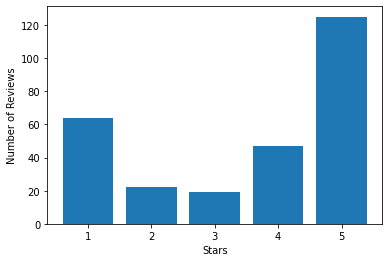

In [14]:
stars_count=df.groupby('stars').count()
plt.bar(stars_count.index.values, stars_count['rbr'])
plt.xlabel('Stars')
plt.ylabel('Number of Reviews')
plt.show()

## Performing Sentiment Analysis using Text Classification


In [15]:
from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import RegexpTokenizer
#tokenizer to remove unwanted elements from out data like symbols and numbers
token = RegexpTokenizer(r'[a-zA-Z0-9]+')
cv = CountVectorizer(lowercase=True,stop_words='english',ngram_range = (1,1),tokenizer = token.tokenize)
text_counts= cv.fit_transform(df['review'])

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    text_counts, df['stars'], test_size=0.3, random_state=1) #actually, random_state isn't necessary

In [17]:
from sklearn.naive_bayes import MultinomialNB
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Generation Using Multinomial Naive Bayes
clf = MultinomialNB().fit(X_train, y_train)
predicted= clf.predict(X_test)
print("MultinomialNB Accuracy:",metrics.accuracy_score(y_test, predicted))

MultinomialNB Accuracy: 0.5


Not great, but it was fun making it. Maybe it could be useful for some bigger dataset. Here is the link for the code: https://www.datacamp.com/community/tutorials/text-analytics-beginners-nltk. 

Ok, wait, wait. They say they can improve it...

In [18]:
from sklearn.feature_extraction.text import TfidfVectorizer
tf=TfidfVectorizer()
text_tf= tf.fit_transform(df['review'])

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    text_tf, df['stars'], test_size=0.3, random_state=123)

In [20]:
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
# Model Generation Using Multinomial Naive Bayes
clf = MultinomialNB().fit(X_train, y_train)
predicted= clf.predict(X_test)
print("MultinomialNB Accuracy:",metrics.accuracy_score(y_test, predicted))

MultinomialNB Accuracy: 0.4523809523809524


Definitely, not good... Ok, it was fun making it, maybe it will be useful on larger datasets. Or I should set the target variable as binary. For example: (1, 2, 3 stars - 1), (4, 5 stars - 5)

## Column values to list

In [21]:
print (df.review.tolist())


[" This app was hit or miss until I found I had an issue with my LG G5 phone. It was not picking up the satellites very well. When I use this app on my wife's phone it works nicely. Happy with this apps functionality now when using it with my Can Am Spyder. Would have given this app 5 stars but I canno...Full ReviewThis app was hit or miss until I found I had an issue with my LG G5 phone. It was not picking up the satellites very well. When I use this app on my wife's phone it works nicely. Happy with this apps functionality now when using it with my Can Am Spyder. Would have given this app 5 stars but I cannot currently hear the apps voice output through my helmet communicator. Might figure that out yet and then update this review. There are free apps for testing the gps functionality of your phone.", ' Would like to see a round route option, but better than some other apps', " To use it, you need another $45 app so your vehicle can connect to it. So it's two apps, the maps, and conne

In [22]:
a = '.'.join(df.review.tolist())
print (a[:1000])

 This app was hit or miss until I found I had an issue with my LG G5 phone. It was not picking up the satellites very well. When I use this app on my wife's phone it works nicely. Happy with this apps functionality now when using it with my Can Am Spyder. Would have given this app 5 stars but I canno...Full ReviewThis app was hit or miss until I found I had an issue with my LG G5 phone. It was not picking up the satellites very well. When I use this app on my wife's phone it works nicely. Happy with this apps functionality now when using it with my Can Am Spyder. Would have given this app 5 stars but I cannot currently hear the apps voice output through my helmet communicator. Might figure that out yet and then update this review. There are free apps for testing the gps functionality of your phone.. Would like to see a round route option, but better than some other apps. To use it, you need another $45 app so your vehicle can connect to it. So it's two apps, the maps, and connection ap

In [23]:
type(a)

str

In [24]:
from nltk.tokenize import word_tokenize

In [25]:
a_tokens = word_tokenize(a)
a_tokens[:10]

['This', 'app', 'was', 'hit', 'or', 'miss', 'until', 'I', 'found', 'I']

In [26]:
len(a_tokens)

8233

In [27]:
from nltk.probability import FreqDist
fdist = FreqDist()

In [28]:
for word in a_tokens:
    fdist[word.lower()]+=1
    
fdist

FreqDist({'.': 458, 'the': 265, 'to': 223, ',': 220, 'i': 216, 'it': 205, 'app': 167, 'and': 165, 'a': 117, '..': 116, ...})

In [29]:
fdist.most_common(20) # make some drops - then find the most common actually useful words :)

[('.', 458),
 ('the', 265),
 ('to', 223),
 (',', 220),
 ('i', 216),
 ('it', 205),
 ('app', 167),
 ('and', 165),
 ('a', 117),
 ('..', 116),
 ('is', 112),
 ('this', 102),
 ('not', 95),
 ('for', 91),
 ('my', 86),
 ('you', 79),
 ('!', 75),
 ('on', 71),
 ('that', 65),
 ('maps', 65)]

# Word Cloud 

In [30]:
from wordcloud import WordCloud, STOPWORDS


In [31]:
print(STOPWORDS)

{'she', 'because', 'on', 'any', 'that', 'there', 'we', "isn't", "when's", 'its', "she'd", 'my', 'so', 'ourselves', 'the', 'very', 'by', 'or', 'been', "didn't", 'had', 'is', 'further', 'themselves', "he'll", 'itself', 'few', 'your', "i've", 'whom', 'have', "shan't", 'being', 'yourself', 'with', 'else', 'r', 'then', "i'd", "why's", 'has', 'i', 'did', 'am', 'cannot', 'herself', "that's", 'com', "shouldn't", "you'd", 'too', 'only', 'and', "she'll", 'yours', 'more', 'some', 'he', 'as', 'no', 'all', 'him', 'their', 'if', 'it', "he'd", 'having', 'himself', 'most', 'about', 'not', 'me', 'when', 'out', 'than', 'before', 'www', 'does', 'should', "couldn't", "what's", 'doing', 'theirs', 'are', "doesn't", "they've", "where's", 'this', 'an', 'from', 'once', 'through', 'would', "we'll", 'both', 'a', "they're", "there's", 'how', "he's", "weren't", "hasn't", 'who', 'those', 'they', "who's", "they'd", "it's", 'was', 'get', "aren't", 'between', 'like', "you've", 'them', 'also', 'off', 'own', "you'll", '

In [32]:
len(STOPWORDS) 



190

Different than nltk. library but looks fine. Let's proceed

In [33]:
all_text_wc = WordCloud(
    background_color='white',
    max_words=200,
    stopwords= set(STOPWORDS)
)

# generate the word cloud
all_text_wc.generate(a)

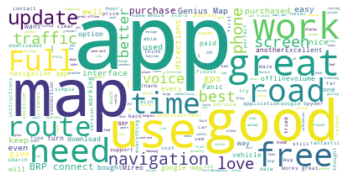

In [34]:
plt.imshow(all_text_wc, interpolation='bilinear')
plt.axis('off')
plt.show()

In [35]:
from PIL import Image

In [36]:
mask1 = np.array(Image.open('Untitled.jpg'))

In [37]:
all_text_wc = WordCloud(
    background_color='white',
    mask=mask1,
    max_words=200,
    stopwords= set(STOPWORDS)
)

# generate the word cloud
all_text_wc.generate(a)

### In the shape of Mireo's logo 

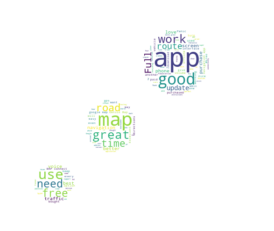

<Figure size 432x288 with 0 Axes>

In [38]:
plt.imshow(all_text_wc, interpolation='bilinear')
plt.axis('off')
plt.show()
plt.savefig('Mireo_logo.jpg')

# TextBlob Sentiment Analysis

In [39]:
from textblob import TextBlob

#### Polarity & subjectivity for whole text

In [40]:
TextBlob(a).sentiment

Sentiment(polarity=0.25797644092873206, subjectivity=0.5579515548291211)

## Adding Polarity & Subjectivity per review to df

In [41]:
from textblob import TextBlob

pol = lambda x: TextBlob(x).sentiment.polarity
sub = lambda x: TextBlob(x).sentiment.subjectivity

df['polarity'] = df['review'].apply(pol)
df['subjectivity'] = df['review'].apply(sub)
df

,rbr,name,date,stars,review,lang,thumb,reply,polarity,subjectivity
0,2,Rc Prod,2020-06-11,4,This app was hit or miss until I found I had ...,en,3,NaN,0.400000,0.633333
1,3,Steve Harding,2020-06-11,4,"Would like to see a round route option, but b...",en,0,NaN,0.058333,0.425000
2,4,Carl Savillo Jr,2020-05-08,1,"To use it, you need another $45 app so your v...",en,9,"Dear Carl,\r\n\r\nthank you for leaving a revi...",-0.100000,0.100000
3,6,Rc Prod,2020-06-11,4,This app was hit or miss until I found I had ...,en,3,NaN,0.400000,0.633333
4,7,Steve Harding,2020-06-11,4,"Would like to see a round route option, but b...",en,0,NaN,0.058333,0.425000
...,...,...,...,...,...,...,...,...,...,...
272,557,A Google user,2018-01-09,5,I Love It,NaN,0,NaN,0.500000,0.600000
273,561,Mohd Sahabat Nor Kekasih lV,2019-05-05,5,g8od,NaN,0,"Dear Sir/Madam,\r\n\r\nthank you for the excel...",0.000000,0.000000
274,567,Charles Hunt,2018-02-28,5,Great app,NaN,0,NaN,0.800000,0.750000
275,574,Darrell Owens,2017-06-01,5,Excellent app,NaN,0,NaN,1.000000,1.000000


## Adding month and year columns 

In [42]:
df['year'] = pd.DatetimeIndex(df['date']).year
df['month'] = pd.DatetimeIndex(df['date']).month
df['year_month'] = pd.to_datetime(df['date']).dt.to_period('M')

df.head()

,rbr,name,date,stars,review,lang,thumb,reply,polarity,subjectivity,year,month,year_month
0,2,Rc Prod,2020-06-11,4,This app was hit or miss until I found I had ...,en,3,NaN,0.400000,0.633333,2020,6,2020-06
1,3,Steve Harding,2020-06-11,4,"Would like to see a round route option, but b...",en,0,NaN,0.058333,0.425000,2020,6,2020-06
2,4,Carl Savillo Jr,2020-05-08,1,"To use it, you need another $45 app so your v...",en,9,"Dear Carl,\r\n\r\nthank you for leaving a revi...",-0.100000,0.100000,2020,5,2020-05
3,6,Rc Prod,2020-06-11,4,This app was hit or miss until I found I had ...,en,3,NaN,0.400000,0.633333,2020,6,2020-06
4,7,Steve Harding,2020-06-11,4,"Would like to see a round route option, but b...",en,0,NaN,0.058333,0.425000,2020,6,2020-06


## Polarity - 3 Graphs 

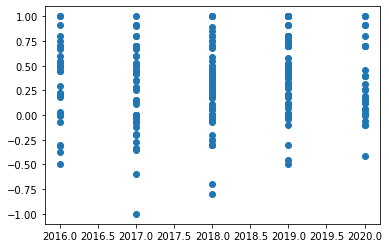

In [43]:
plt.scatter(df['year'], df['polarity'])

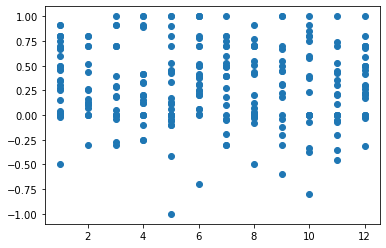

In [44]:
plt.scatter(df['month'], df['polarity'])

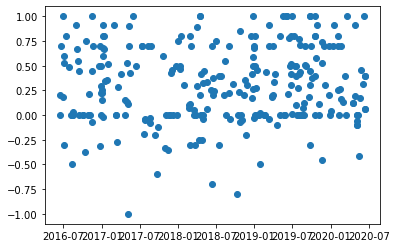

In [45]:
plt.scatter(df['date'], df['polarity'])

## Subjectivity - 3 Graphs 

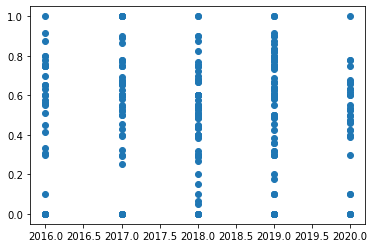

In [46]:
plt.scatter(df['year'], df['subjectivity'])

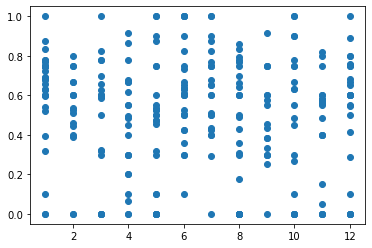

In [47]:
plt.scatter(df['month'], df['subjectivity'])

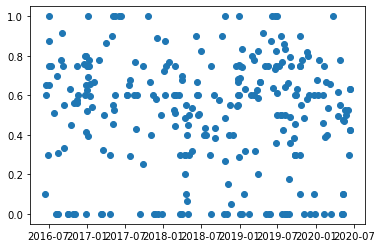

In [48]:
plt.scatter(df['date'], df['subjectivity'])


# Order by date 

In [49]:
df.groupby(df['date'].map(lambda x: x.year))


In [50]:
df

,rbr,name,date,stars,review,lang,thumb,reply,polarity,subjectivity,year,month,year_month
0,2,Rc Prod,2020-06-11,4,This app was hit or miss until I found I had ...,en,3,NaN,0.400000,0.633333,2020,6,2020-06
1,3,Steve Harding,2020-06-11,4,"Would like to see a round route option, but b...",en,0,NaN,0.058333,0.425000,2020,6,2020-06
2,4,Carl Savillo Jr,2020-05-08,1,"To use it, you need another $45 app so your v...",en,9,"Dear Carl,\r\n\r\nthank you for leaving a revi...",-0.100000,0.100000,2020,5,2020-05
3,6,Rc Prod,2020-06-11,4,This app was hit or miss until I found I had ...,en,3,NaN,0.400000,0.633333,2020,6,2020-06
4,7,Steve Harding,2020-06-11,4,"Would like to see a round route option, but b...",en,0,NaN,0.058333,0.425000,2020,6,2020-06
...,...,...,...,...,...,...,...,...,...,...,...,...,...
272,557,A Google user,2018-01-09,5,I Love It,NaN,0,NaN,0.500000,0.600000,2018,1,2018-01
273,561,Mohd Sahabat Nor Kekasih lV,2019-05-05,5,g8od,NaN,0,"Dear Sir/Madam,\r\n\r\nthank you for the excel...",0.000000,0.000000,2019,5,2019-05
274,567,Charles Hunt,2018-02-28,5,Great app,NaN,0,NaN,0.800000,0.750000,2018,2,2018-02
275,574,Darrell Owens,2017-06-01,5,Excellent app,NaN,0,NaN,1.000000,1.000000,2017,6,2017-06


## Nicer way to make group by some column in df 

In [51]:
period = '1Y'

In [52]:
df.groupby(pd.Grouper(key='date', freq=period))['stars'].describe()

,count,mean,std,min,25%,50%,75%,max
date,,,,,,,,
2016-12-31,39.0,3.384615,1.679840,1.0,1.0,4.0,5.0,5.0
2017-12-31,52.0,3.653846,1.570370,1.0,2.0,4.0,5.0,5.0
2018-12-31,69.0,3.275362,1.713991,1.0,1.0,4.0,5.0,5.0
2019-12-31,84.0,3.880952,1.539870,1.0,3.0,5.0,5.0,5.0
2020-12-31,33.0,3.151515,1.734236,1.0,1.0,4.0,5.0,5.0


## grouped by year_month

In [53]:
df_gbym=df.groupby('year_month').mean() # df grouped by year month

In [54]:
df_gbym

,rbr,stars,thumb,polarity,subjectivity,year,month
year_month,,,,,,,
2016-06,338.250000,4.250000,0.250000,0.475000,0.412500,2016.0,6.0
2016-07,353.166667,3.000000,0.666667,0.383889,0.756111,2016.0,7.0
2016-08,303.166667,2.833333,1.000000,0.073889,0.298056,2016.0,8.0
2016-09,323.000000,4.000000,0.500000,0.416667,0.637500,2016.0,9.0
2016-10,311.000000,3.200000,3.000000,0.075455,0.216182,2016.0,10.0
2016-11,292.666667,3.666667,1.166667,0.381771,0.508333,2016.0,11.0
2016-12,313.750000,3.250000,1.250000,0.267083,0.596260,2016.0,12.0
2017-01,234.727273,4.363636,0.727273,0.503271,0.664542,2017.0,1.0
2017-02,227.000000,5.000000,4.000000,0.516667,0.666667,2017.0,2.0


In [55]:
df_gbym.describe()

,rbr,stars,thumb,polarity,subjectivity,year,month
count,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000
mean,182.470407,3.497901,1.204594,0.297058,0.514161,2017.959184,6.489796
std,107.401692,0.872060,1.168830,0.192763,0.165855,1.257630,3.452791
min,24.750000,1.000000,0.000000,-0.308333,0.216182,2016.000000,1.000000
25%,80.666667,3.125000,0.500000,0.171607,0.395833,2017.000000,4.000000
50%,177.666667,3.461538,0.800000,0.302309,0.508333,2018.000000,6.000000
75%,277.250000,4.200000,1.666667,0.446875,0.622654,2019.000000,9.000000
max,393.500000,5.000000,6.000000,0.750000,1.000000,2020.000000,12.000000


### Grouped by year 

In [56]:
df_y=df.groupby('year')

In [57]:
df_y

In [58]:

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [59]:
df_y.describe()

rbr                                                              stars                                              thumb                                                polarity                                                                  subjectivity                                                           month                                               
     count        mean         std    min     25%    50%     75%    max count      mean       std  min  25%  50%  75%  max count      mean       std  min  25%  50%   75%   max    count      mean       std       min       25%       50%       75%  max        count      mean       std  min       25%     50%       75%  max count      mean       std  min  25%  50%   75%   max
year                                                                                                                                                                                                                                                                                                                                                                                 
2016  39.0  318.051282  116.964446  231.0  247.50  260.0  282.50  572.0  39.0  3.384615  1.679840  1.0  1.0  4.0  5.0  5.0  39.0  1.153846  2.020141  0.0  0.0  0.0  1.00  10.0     39.0  0.285074  0.389167 -0.500000  0.000000  0.225000  0.575000  1.0         39.0  0.498102  0.309747  0.0  0.304167  0.6000  0.750000  1.0  39.0  9.282051  2.076798  6.0  7.5  9.0  11.0  12.0
2017  52.0  276.673077  125.419566  190.0  207.75  221.5  236.25  577.0  52.0  3.653846  1.570370  1.0  2.0  4.0  5.0  5.0  52.0  1.730769  3.138098  0.0  0.0  0.5  1.25  14.0     52.0  0.261826  0.426712 -1.000000 -0.006042  0.270312  0.616667  1.0         52.0  0.550745  0.303636  0.0  0.399792  0.6000  0.750000  1.0  52.0  5.846154  3.712114  1.0  3.0  5.0   9.0  12.0
2018  69.0  162.086957  101.054403   26.0  106.00  161.0  178.00  567.0  69.0  3.275362  1.713991  1.0  1.0  4.0  5.0  5.0  69.0  0.913043  1.411498  0.0  0.0  0.0  1.00   6.0     69.0  0.270216  0.385533 -0.800000  0.000000  0.250000  0.500000  1.0         69.0  0.484736  0.255194  0.0  0.300000  0.5125  0.666667  1.0  69.0  6.594203  3.659471  1.0  4.0  6.0  10.0  12.0
2019  84.0   85.464286   64.329807   20.0   47.75   79.0  110.25  561.0  84.0  3.880952  1.539870  1.0  3.0  5.0  5.0  5.0  84.0  0.869048  1.655802  0.0  0.0  0.0  1.00   9.0     84.0  0.376997  0.368454 -0.500000  0.000000  0.400000  0.700000  1.0         84.0  0.512272  0.308559  0.0  0.300000  0.6000  0.750000  1.0  84.0  6.666667  3.249961  1.0  4.0  7.0   9.0  12.0
2020  33.0   50.424242   47.053846    2.0   11.00   19.0   92.00  129.0  33.0  3.151515  1.734236  1.0  1.0  4.0  5.0  5.0  33.0  1.515152  2.739996  0.0  0.0  0.0  3.00   9.0     33.0  0.290779  0.364226 -0.416667  0.000000  0.175595  0.460000  1.0         33.0  0.456964  0.263008  0.0  0.390000  0.5000  0.633333  1.0  33.0  3.787879  1.709488  1.0  2.0  4.0   5.0   6.0

In [60]:
x = df.to_excel

In [61]:
t=df_y.describe()
print(t)
t.to_excel('table_y.xlsx')

       rbr                                                              stars                                              thumb                                                polarity                                                                  subjectivity                                                           month                                               
     count        mean         std    min     25%    50%     75%    max count      mean       std  min  25%  50%  75%  max count      mean       std  min  25%  50%   75%   max    count      mean       std       min       25%       50%       75%  max        count      mean       std  min       25%     50%       75%  max count      mean       std  min  25%  50%   75%   max
year                                                                                                                                                                                                                                                        

### Statistics on gbym m & sd

In [62]:
df_gbym=df.groupby('year')

In [63]:
df_gbym['stars'].describe()

,count,mean,std,min,25%,50%,75%,max
year,,,,,,,,
2016,39.0,3.384615,1.679840,1.0,1.0,4.0,5.0,5.0
2017,52.0,3.653846,1.570370,1.0,2.0,4.0,5.0,5.0
2018,69.0,3.275362,1.713991,1.0,1.0,4.0,5.0,5.0
2019,84.0,3.880952,1.539870,1.0,3.0,5.0,5.0,5.0
2020,33.0,3.151515,1.734236,1.0,1.0,4.0,5.0,5.0


In [64]:
df_gbym['stars'].mean()

year
2016    3.384615
2017    3.653846
2018    3.275362
2019    3.880952
2020    3.151515
Name: stars, dtype: float64

In [65]:
df_gbym['stars'].std()

year
2016    1.679840
2017    1.570370
2018    1.713991
2019    1.539870
2020    1.734236
Name: stars, dtype: float64

### Average mark in Playstore is 4.2. - people tend to comment negative things more

https://play.google.com/store/apps/details?id=hr.mireo.arthur&hl=en

In the case of Genius maps, average star mark is lower if people leave comments - people that are deeply provoked are willing to say something. 

## Average review depending on year

In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 277 entries, 0 to 276
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   rbr           277 non-null    int64         
 1   name          277 non-null    object        
 2   date          277 non-null    datetime64[ns]
 3   stars         277 non-null    int8          
 4   review        277 non-null    object        
 5   lang          229 non-null    object        
 6   thumb         277 non-null    int64         
 7   reply         76 non-null     object        
 8   polarity      277 non-null    float64       
 9   subjectivity  277 non-null    float64       
 10  year          277 non-null    int64         
 11  month         277 non-null    int64         
 12  year_month    277 non-null    period[M]     
dtypes: datetime64[ns](1), float64(2), int64(4), int8(1), object(4), period[M](1)
memory usage: 26.4+ KB


How TextBlob Sentiment analysis wokrs: <a href='https://www.youtube.com/watch?v=xvqsFTUsOmc'> 1:12:15 

In [67]:
TextBlob("good").sentiment

Sentiment(polarity=0.7, subjectivity=0.6000000000000001)

In [68]:
TextBlob("great").sentiment

Sentiment(polarity=0.8, subjectivity=0.75)

In [69]:
TextBlob("not great").sentiment

Sentiment(polarity=-0.4, subjectivity=0.75)

In [70]:
TextBlob("very great").sentiment

Sentiment(polarity=1.0, subjectivity=0.9750000000000001)

In [71]:
TextBlob("I am great").sentiment

Sentiment(polarity=0.8, subjectivity=0.75)

In [72]:
import math

In [73]:
from nltk.util import bigrams, trigrams, ngrams

In [74]:
text_bigrams = list(nltk.bigrams(a_tokens))

In [75]:
text_bigrams;

In [76]:
text_trigrams = list(nltk.trigrams(a_tokens))
text_trigrams;

In [77]:
text_ngrams = list(nltk.ngrams(a_tokens, 5))
text_ngrams;

## Reviews with more than 5 thumbs-ups

In [78]:
#trying to make some reasonalbe measure for sorting 
df_above_average = df['thumb'].mean() * (df['thumb'].mean()* df['thumb'].std()*2)
df_above_average

5.813357919152482

In [79]:
# put with more than 10 or 20 on larger apps.
df_tmp = df[df_above_average <= df['thumb']].copy()
df_tmp.sort_values(by=["thumb"], ascending=False)


,rbr,name,date,stars,review,lang,thumb,reply,polarity,subjectivity,year,month,year_month
158,197,Miroslav Fiolica,2017-07-22,1,They give me free app on prize game and if i ...,en,14,NaN,-0.195312,0.650000,2017,7,2017-07
159,198,Joan Weston,2017-07-26,2,Ridiculous. 2 out of every 5 addresses could...,en,11,NaN,-0.052083,0.677083,2017,7,2017-07
157,196,A Google user,2017-08-22,3,I'm giving you a try (after purchasing everyt...,en,10,NaN,-0.076923,0.430769,2017,8,2017-08
191,244,Mehmood Mohammed,2016-10-11,1,Pathetic service They said you can transfer pu...,en,10,NaN,-0.372727,0.630909,2016,10,2016-10
2,4,Carl Savillo Jr,2020-05-08,1,"To use it, you need another $45 app so your v...",en,9,"Dear Carl,\r\n\r\nthank you for leaving a revi...",-0.100000,0.100000,2020,5,2020-05
5,8,Carl Savillo Jr,2020-05-08,1,"To use it, you need another $45 app so your v...",en,9,"Dear Carl,\r\n\r\nthank you for leaving a revi...",-0.100000,0.100000,2020,5,2020-05
12,15,Ivy Poison,2020-02-21,1,"99% of the time fully useless, 1% of the time...",en,9,NaN,0.166667,0.400000,2020,2,2020-02
22,25,Richard Stangroom,2019-08-22,3,"Navigation is ok, the voice instructions are ...",en,9,NaN,0.072857,0.662381,2019,8,2019-08
151,190,Vladimir Shapranov,2017-12-07,2,Does not start without access to contacts,en,9,NaN,0.000000,0.000000,2017,12,2017-12
19,22,Ron Schunk,2019-06-27,1,"Have some problems...app comes up fine, EXCEP...",en,7,"Dear Ron,\r\n\r\nthank you for leaving a revie...",0.416667,0.500000,2019,6,2019-06


## Reviews by thumbs and stars 

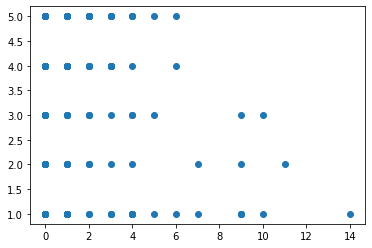

In [80]:
plt.scatter(df['thumb'], df['stars'])